In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier

from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix,recall_score

from imblearn.over_sampling import SMOTE

**1. Read the dataset (tab, csv, xls, txt, inbuilt dataset)**

In [96]:
df=pd.read_excel('Bank_Personal_Loan_Modelling-1 (1).xlsx',sheet_name=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


2. Summarize important observations from the data set (5 MARKS)
Some pointers which would help you, but don’t be limited by these
* Find out number of rows; no. & types of variables (continuous, categorical etc.)
* Calculate five-point summary for numerical variables
* Summarize observations for categorical variables – no. of categories, % observations in each category

In [97]:
# Number of rows
df.shape[0]

5000

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [99]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [100]:
num_cols=['ID','Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg','Mortgage']

In [101]:
cat_cols=['Family','Education','Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard']

In [102]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0


In [103]:
df['CD Account'].value_counts(normalize=True)

CD Account
0    0.9396
1    0.0604
Name: proportion, dtype: float64

In [104]:
for i in cat_cols:
    print(df[i].value_counts())

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
Personal Loan
0    4520
1     480
Name: count, dtype: int64
Securities Account
0    4478
1     522
Name: count, dtype: int64
CD Account
0    4698
1     302
Name: count, dtype: int64
Online
1    2984
0    2016
Name: count, dtype: int64
CreditCard
0    3530
1    1470
Name: count, dtype: int64


In [105]:
for i in cat_cols:
    print(df[i].value_counts(normalize=True)*100)

Family
1    29.44
2    25.92
4    24.44
3    20.20
Name: proportion, dtype: float64
Education
1    41.92
3    30.02
2    28.06
Name: proportion, dtype: float64
Personal Loan
0    90.4
1     9.6
Name: proportion, dtype: float64
Securities Account
0    89.56
1    10.44
Name: proportion, dtype: float64
CD Account
0    93.96
1     6.04
Name: proportion, dtype: float64
Online
1    59.68
0    40.32
Name: proportion, dtype: float64
CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64


3. Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 MARKS)
Some pointers which would help you, but don’t be limited by these
* Do variables have missing/null values?
* Do variables have outliers?
* Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem.

In [106]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: >

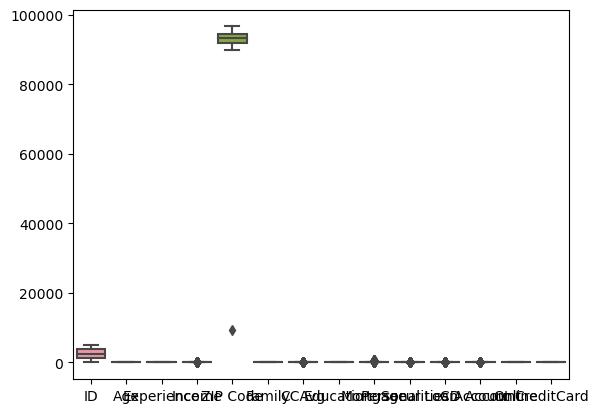

In [107]:
sns.boxplot(df)

for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    df.loc[df[i]>ul,i]=ul
    df.loc[df[i]<ll,i]=ll

In [108]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [109]:
x=df.drop(columns=['Personal Loan'])
y=df['Personal Loan']

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=2)

In [111]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(4000, 13) (4000,) (1000, 13) (1000,)


In [112]:
y_train.value_counts()

Personal Loan
0    3616
1     384
Name: count, dtype: int64

In [113]:
os=SMOTE(sampling_strategy=0.6)

In [114]:
x_train_os,y_train_os=os.fit_resample(x_train,y_train)

In [115]:
y_train.value_counts()

Personal Loan
0    3616
1     384
Name: count, dtype: int64

In [116]:
# Ensemble 

In [117]:
def model_validation(model,trainx,trainy,testx,testy):
    m=model
    m.fit(trainx,trainy)
    y_pred=model.predict(testx)
    print('Confusion Matrix',confusion_matrix(testy,y_pred))
    print('classification_report ',classification_report(testy,y_pred))
    print('cohen_kappa_score',cohen_kappa_score(testy,y_pred))

In [118]:
model_validation(LogisticRegression(),x_train_os,y_train_os,x_test,y_test)

Confusion Matrix [[803 101]
 [ 20  76]]
classification_report                precision    recall  f1-score   support

           0       0.98      0.89      0.93       904
           1       0.43      0.79      0.56        96

    accuracy                           0.88      1000
   macro avg       0.70      0.84      0.74      1000
weighted avg       0.92      0.88      0.89      1000

cohen_kappa_score 0.49375774006761053
